# MUHAMMAD TAYYAB SOHAIL
# 21i2478
# CS B
# NLP ASSIGNMENT :2


In [39]:
import pandas as pd
import string
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
import numpy as np
import math
import random
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
##################################################################
# Load the dataset
dataset = pd.read_csv('factuality_annotations_xsum_summaries.csv')
extracted_data = dict(zip(dataset['summary'], dataset['is_factual']))
print(extracted_data)
##################################################################



{'more than 50 pupils at a bristol academy have been sent home from school because of a lack of uniform.': 'no', 'the wife of a british-iranian woman jailed in iran has called on the government to appeal against her conviction.': 'no', 'police searching for a greenock woman who has been missing for more than a decade have launched a fresh search for her.': 'no', 'aberdeen have appointed arbroath boss paul sheerin as their new manager.': 'no', 'a six-year-old girl from cheshire who was given a rare form of leukaemia by her parents has had a life-changing trial in': 'no', 'a kenyan police officer has been shot dead by a gunman who broke into his farm home, police say.': 'no', 'one in five parents in england eat vegetables at home, a survey suggests.': 'no', "a woman was assaulted and assaulted in a mcdonald's restaurant in kent, police have said.": 'yes', 'police in southern china have seized more than 1, 000 alcohol bottles and seized more than 1, 200 bottles of contaminated milk, local

In [18]:
##################################################################
# Clean the reviews directly from the dataset
cleaned_text = {}
for summary, is_factual in extracted_data.items():
    # Step 1: Convert to lowercase
    cleaned_summary = summary.lower()
    
    # Step 2: Remove punctuation
    cleaned_summary = cleaned_summary.translate(str.maketrans('', '', string.punctuation))
    
    # Step 3: Remove numbers
    cleaned_summary = re.sub(r'\d+', '', cleaned_summary)
    
    # Store the cleaned summary with its factuality label in a new dictionary
    cleaned_text[cleaned_summary] = is_factual

##################################################################
print(cleaned_text)



{'more than  pupils at a bristol academy have been sent home from school because of a lack of uniform': 'no', 'the wife of a britishiranian woman jailed in iran has called on the government to appeal against her conviction': 'no', 'police searching for a greenock woman who has been missing for more than a decade have launched a fresh search for her': 'no', 'aberdeen have appointed arbroath boss paul sheerin as their new manager': 'no', 'a sixyearold girl from cheshire who was given a rare form of leukaemia by her parents has had a lifechanging trial in': 'no', 'a kenyan police officer has been shot dead by a gunman who broke into his farm home police say': 'no', 'one in five parents in england eat vegetables at home a survey suggests': 'no', 'a woman was assaulted and assaulted in a mcdonalds restaurant in kent police have said': 'yes', 'police in southern china have seized more than   alcohol bottles and seized more than   bottles of contaminated milk local media report': 'no', 'a for

In [19]:
# Create a set for unique tokens
unique_tokens = set()

# Tokenize the cleaned text and add to the set
for cleaned_summary in cleaned_text.keys():
    tokens_summary = word_tokenize(cleaned_summary)
    unique_tokens.update(tokens_summary)  # Add tokens to the set

# Print the unique tokens as a set
print(unique_tokens)

{'container', 'norway', 'mooney', 'bin', 'appearance', 'mayor', 'point', 'ababa', 'material', 'cyclist', 'twoandahalf', 'reds', 'micheál', 'called', 'broke', 'witnesses', 'tamaulipas', 'character', 'stars', 'scams', 'indonesia', 'erdogan', 'hopes', 'gay', 'wilson', 'force', 'clegg', 'assaulted', 'stonehenge', 'whose', 'beating', 'agreement', 'bomber', 'mcinnes', 'moroccan', 'daughter', 'iilisted', 'operations', 'stole', 'patient', 'expanding', 'marking', 'online', 'auction', 'pavement', 'clement', 'absolutely', 'viktor', 'unrealisticby', 'water', 'date', 'thing', 'players', 'if', 'fresh', 'poisoning', 'fiction', 'experiences', 'disney', 'application', 'research', 'vader', 'our', 'equaliser', 'ddyfodol', 'link', 'panther', 'remain', 'nicholas', 'unveil', 'udr', 'sharjah', 'dominic', 'investigated', 'province', 'hotel', 'lollipop', 'dragons', 'main', 'freak', 'britishiranian', 'by', 'company', 'qualifier', 'super', 'evans', 'cladding', 'octopus', 'upsetby', 'country', 'took', 'worried', 

### BAG OF WORDS APPROACH USED

In [20]:
vocabulary = list(unique_tokens)

# Assign a unique index to each word in the vocabulary
word_index = {word: idx for idx, word in enumerate(vocabulary)}
print(word_index)

{'container': 0, 'norway': 1, 'mooney': 2, 'bin': 3, 'appearance': 4, 'mayor': 5, 'point': 6, 'ababa': 7, 'material': 8, 'cyclist': 9, 'twoandahalf': 10, 'reds': 11, 'micheál': 12, 'called': 13, 'broke': 14, 'witnesses': 15, 'tamaulipas': 16, 'character': 17, 'stars': 18, 'scams': 19, 'indonesia': 20, 'erdogan': 21, 'hopes': 22, 'gay': 23, 'wilson': 24, 'force': 25, 'clegg': 26, 'assaulted': 27, 'stonehenge': 28, 'whose': 29, 'beating': 30, 'agreement': 31, 'bomber': 32, 'mcinnes': 33, 'moroccan': 34, 'daughter': 35, 'iilisted': 36, 'operations': 37, 'stole': 38, 'patient': 39, 'expanding': 40, 'marking': 41, 'online': 42, 'auction': 43, 'pavement': 44, 'clement': 45, 'absolutely': 46, 'viktor': 47, 'unrealisticby': 48, 'water': 49, 'date': 50, 'thing': 51, 'players': 52, 'if': 53, 'fresh': 54, 'poisoning': 55, 'fiction': 56, 'experiences': 57, 'disney': 58, 'application': 59, 'research': 60, 'vader': 61, 'our': 62, 'equaliser': 63, 'ddyfodol': 64, 'link': 65, 'panther': 66, 'remain': 

In [21]:
# Convert text into a word vector
def convert_to_vector(text, word_index):
    vector = np.zeros(len(word_index))
    tokens = word_tokenize(text)
    for token in tokens:
        if token in word_index:
            vector[word_index[token]] += 1
    return vector

# Prepare input (X) and labels (Y)
X = [convert_to_vector(summary, word_index) for summary in cleaned_text.keys()]
Y = [1 if label == 'no' else 0 for label in cleaned_text.values()]

X = np.array(X)
Y = np.array(Y)

# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

# Logistic regression model
def sigmoid(z):
    return 1 / (1 + np.exp(-z))



In [22]:
def train_model(X_train, Y_train, learning_rate=0.01, epochs=500):
    num_features = X_train.shape[1]
    weights = np.random.uniform(-0.1, 0.1, num_features)
    bias = 0

    for epoch in range(epochs):
        for i in range(len(X_train)):
            linear_output = np.dot(X_train[i], weights) + bias
            prediction = sigmoid(linear_output)
            error = prediction - Y_train[i]
            weights -= learning_rate * error * X_train[i]
            bias -= learning_rate * error

    return weights, bias

weights, bias = train_model(X_train, Y_train)



In [29]:
# Test the model
def predict(X_test, weights, bias):
    predictions = []
    for x in X_test:
        linear_output = np.dot(x, weights) + bias
        prob = sigmoid(linear_output)
        predictions.append(1 if prob >= 0.5 else 0)
    return predictions

Y_pred = predict(X_test, weights, bias)



In [33]:
def evaluate(Y_pred, Y_test):
    true_pos, false_pos, true_neg, false_neg = 0, 0, 0, 0

    for i in range(len(Y_test)):
        # if the actual label is "no" (1) or "yes" (0)
        if Y_test[i] == 1:  # Actual is hallucinated (no)
            if Y_pred[i] == 1:  # Detected hallucination
                true_pos += 1  # True Positive
            else:
                false_neg += 1  # False Negative
        else:  # Actual is factual (yes)
            if Y_pred[i] == 1:  # Detected hallucination (but actually factual)
                false_pos += 1  # False Positive
            else:
                true_neg += 1  # True Negative

    # Calculating evaluation metrics
    accuracy = (true_pos + true_neg) / len(Y_test)
    precision = true_pos / (true_pos + false_pos) if (true_pos + false_pos) > 0 else 0
    recall = true_pos / (true_pos + false_neg) if (true_pos + false_neg) > 0 else 0
    f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    # Printing the evaluation metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1_score}")

    return accuracy, precision, recall, f1_score

# Call the evaluate function with your predictions and test labels
evaluate(Y_pred, Y_test)



Accuracy: 0.8632707774798928
Precision: 0.9051724137931034
Recall: 0.9459459459459459
F1 Score: 0.9251101321585904


(0.8632707774798928,
 0.9051724137931034,
 0.9459459459459459,
 0.9251101321585904)

In [43]:
def confusion_matrix(Y_test, Y_pred):
    true_pos, false_pos, true_neg, false_neg = 0, 0, 0, 0

    for i in range(len(Y_test)):
        if Y_pred[i] == 1 and Y_test[i] == 1:
            true_pos += 1
        elif Y_pred[i] == 1 and Y_test[i] == 0:
            false_pos += 1
        elif Y_pred[i] == 0 and Y_test[i] == 1:
            false_neg += 1
        else:
            true_neg += 1

    return [[true_pos, false_pos], [false_neg, true_neg]]

# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Print confusion matrix in a readable format
print("Confusion Matrix:")
print(f"{'':<20} {'Predicted Positive':<20} {'Predicted Negative':<20}")
print(f"{'Actual Positive':<20} {cm[0][0]:<20} {cm[0][1]:<20}")
print(f"{'Actual Negative':<20} {cm[1][0]:<20} {cm[1][1]:<20}")


Confusion Matrix:
                     Predicted Positive   Predicted Negative  
Actual Positive      314                  44                  
Actual Negative      6                    8                   


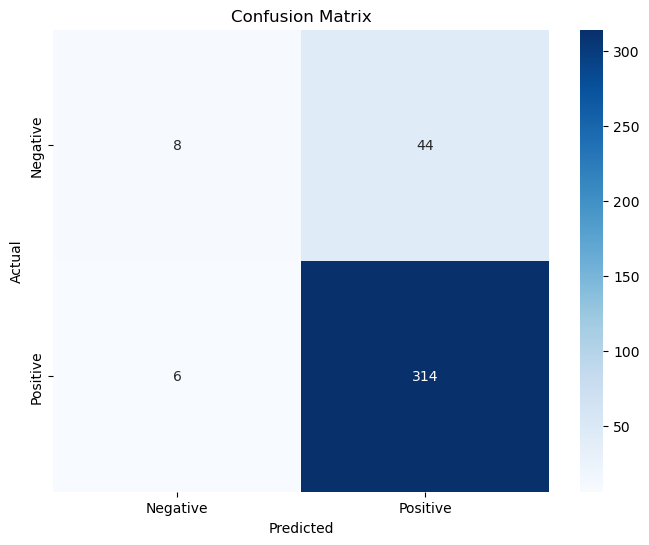

In [40]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage:
plot_confusion_matrix(Y_test, Y_pred)

In [35]:
# K-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True)
accuracies = []

print("K-Fold Cross-Validation Results:")
for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    weights, bias = train_model(X_train, Y_train)
    Y_pred = predict(X_test, weights, bias)

    accuracy, precision, recall, f1_score = evaluate(Y_pred, Y_test)
    accuracies.append(accuracy)

    print(f"Fold {fold} Accuracy: {accuracy:.4f}")

average_accuracy = np.mean(accuracies)
std_deviation = np.std(accuracies)

print(f"\nAverage Accuracy: {average_accuracy:.4f}")
print(f"Standard Deviation: {std_deviation:.4f}")



K-Fold Cross-Validation Results:
Accuracy: 0.868632707774799
Precision: 0.9036827195467422
Recall: 0.9550898203592815
F1 Score: 0.928675400291121
Fold 1 Accuracy: 0.8686
Accuracy: 0.8709677419354839
Precision: 0.905982905982906
Recall: 0.954954954954955
F1 Score: 0.9298245614035088
Fold 2 Accuracy: 0.8710
Accuracy: 0.8763440860215054
Precision: 0.9193083573487032
Recall: 0.9465875370919882
F1 Score: 0.932748538011696
Fold 3 Accuracy: 0.8763
Accuracy: 0.8548387096774194
Precision: 0.9002932551319648
Recall: 0.9388379204892966
F1 Score: 0.9191616766467066
Fold 4 Accuracy: 0.8548
Accuracy: 0.8655913978494624
Precision: 0.8770949720670391
Recall: 0.98125
F1 Score: 0.9262536873156343
Fold 5 Accuracy: 0.8656

Average Accuracy: 0.8673
Standard Deviation: 0.0071


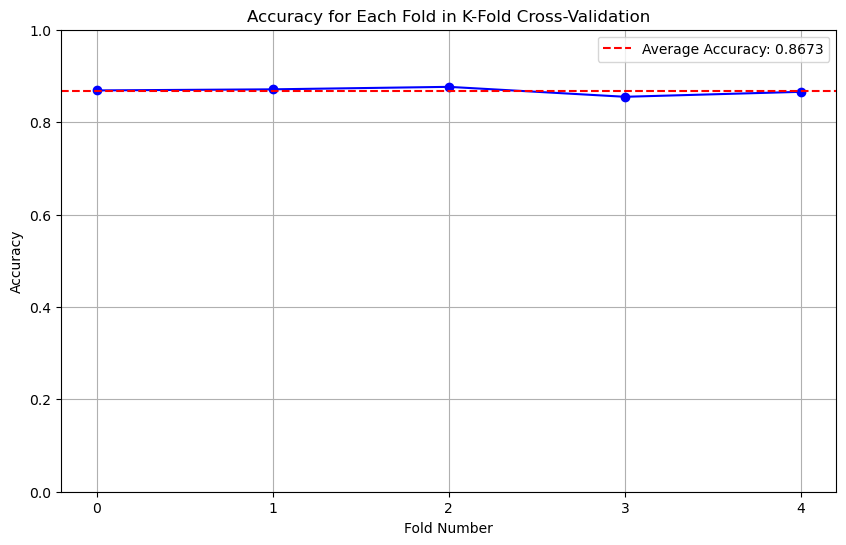

In [42]:
def plot_accuracy(accuracies):
    plt.figure(figsize=(10, 6))
    plt.plot(accuracies, marker='o', linestyle='-', color='b')
    plt.title('Accuracy for Each Fold in K-Fold Cross-Validation')
    plt.xlabel('Fold Number')
    plt.ylabel('Accuracy')
    plt.xticks(np.arange(len(accuracies)))
    plt.ylim([0, 1])
    plt.grid()
    plt.axhline(np.mean(accuracies), color='r', linestyle='--', label=f'Average Accuracy: {np.mean(accuracies):.4f}')
    plt.legend()
    plt.show()
plot_accuracy(accuracies)


In [36]:
# Error Analysis
examples = []
for i, (input, pred_y, actual_y) in enumerate(zip(X_test, Y_pred, Y_test)):
    if pred_y != actual_y:
        input_text = list(cleaned_text.keys())[test_index[i]]
        examples.append((input_text, pred_y, actual_y))

print("\nError Analysis:")
for i, (input_text, pred_y, actual_y) in enumerate(examples):
    print(f"Example {i + 1}:")
    print(f"Input: {input_text}")
    print(f"Predicted Label: {pred_y}")
    print(f"Actual Label: {actual_y}\n")


Error Analysis:
Example 1:
Input: one of the worlds most rare opal mines is being put up for display in south australia
Predicted Label: 1
Actual Label: 0

Example 2:
Input: colchesters unbeaten run came to an end as they were held to a draw at blackpool
Predicted Label: 1
Actual Label: 0

Example 3:
Input: a man has been found stabbed to death at his home police have said
Predicted Label: 1
Actual Label: 0

Example 4:
Input: the uk independence party spent more than £  on campaigning during the general election the electoral commission has said
Predicted Label: 1
Actual Label: 0

Example 5:
Input: a british jihadist who travelled to syria to fight with socalled islamic state has been described by experts as  one of the most dangerous  british
Predicted Label: 1
Actual Label: 0

Example 6:
Input: thousands of bottles of plastic plastic bottles have washed up on a cornish beach
Predicted Label: 1
Actual Label: 0

Example 7:
Input: campaigners are calling for a vaccinating vaccination a

## Reasons for Misclassification:
### 1) Phrasing that is unclear or misleading, leading to model confusion.
### 2) Use of rare or specialized vocabulary that the model may not recognize.
### 3) Failure to accurately reflect the significance of factual information.
### 4) Specific names, locations, or entities might create ambiguity for the model.
### 5) The model may not fully understand the overall context or meaning of a statement.


## Suggested Improvements:
### 1) Increase the diversity of the training dataset to include a broader range of examples.
### 2) Utilize advanced word embeddings that capture contextual nuances better.
### 3) Incorporate regularization methods to prevent overfitting.
### 4) Optimize hyperparameters to enhance model performance.
### 5) Explore more sophisticated models to effectively capture the underlying relationships in the data.
